# EDA(Exploratory data analysis)

*explore the data to understand its structure, detect patterns, and uncover underlying relationships, trends, and anomalies before applying more formal statistical techniques or machine learning models.*

## 1. Understand the Data

**Load the Data: Import the dataset into your working environment**

In [84]:
import pandas as pd
data = pd.read_csv('C:/Users/HP/Downloads/Annual Survey.csv')

**Check the Shape: Look at the number of rows and columns.**

In [86]:
data.shape  # (rows, columns)

(50985, 11)

**Examine the Columns: Get a sense of the data types and names of the columns.**

In [88]:
data.info()  # Column names and types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50985 entries, 0 to 50984
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sr_no.                       20825 non-null  float64
 1   Year                         50985 non-null  int64  
 2   Industry_aggregation_NZSIOC  50985 non-null  object 
 3   Industry_code_NZSIOC         50985 non-null  object 
 4   Industry_name_NZSIOC         50985 non-null  object 
 5   Units                        50985 non-null  object 
 6   Variable_code                50985 non-null  object 
 7   Variable_name                50985 non-null  object 
 8   Variable_category            50985 non-null  object 
 9   Value                        50985 non-null  object 
 10  Industry_code_ANZSIC06       50985 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.3+ MB


**Sample the Data: Preview the first few rows of the dataset to get an idea of the data values.**

In [90]:
data.head()  # Show the first 5 rows

,Sr_no.,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
0,1.0,2023,Level 1,99999,All industries,Dollars (millions),H01,Total income,Financial performance,930995,ANZSIC06 divisions A-S (excluding classes K633...
1,2.0,2023,Level 1,99999,All industries,Dollars (millions),H04,"Sales, government funding, grants and subsidies",Financial performance,821630,ANZSIC06 divisions A-S (excluding classes K633...
2,3.0,2023,Level 1,99999,All industries,Dollars (millions),H05,"Interest, dividends and donations",Financial performance,84354,ANZSIC06 divisions A-S (excluding classes K633...
3,4.0,2023,Level 1,99999,All industries,Dollars (millions),H07,Non-operating income,Financial performance,25010,ANZSIC06 divisions A-S (excluding classes K633...
4,5.0,2023,Level 1,99999,All industries,Dollars (millions),H08,Total expenditure,Financial performance,832964,ANZSIC06 divisions A-S (excluding classes K633...


## 2. Data Cleaning

*Cleaning the data is essential to ensure that you are working with accurate and reliable information. This step includes handling missing data, fixing data types, and removing or correcting errors.*

**Handling Missing Data:**

In [92]:
data.isnull().sum()  # Count missing values in each column

Sr_no.                         30160
Year                               0
Industry_aggregation_NZSIOC        0
Industry_code_NZSIOC               0
Industry_name_NZSIOC               0
Units                              0
Variable_code                      0
Variable_name                      0
Variable_category                  0
Value                              0
Industry_code_ANZSIC06             0
dtype: int64

**Removing missing data:**

In [94]:
data.dropna()  # Remove rows with missing values

,Sr_no.,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
0,1.0,2023,Level 1,99999,All industries,Dollars (millions),H01,Total income,Financial performance,930995,ANZSIC06 divisions A-S (excluding classes K633...
1,2.0,2023,Level 1,99999,All industries,Dollars (millions),H04,"Sales, government funding, grants and subsidies",Financial performance,821630,ANZSIC06 divisions A-S (excluding classes K633...
2,3.0,2023,Level 1,99999,All industries,Dollars (millions),H05,"Interest, dividends and donations",Financial performance,84354,ANZSIC06 divisions A-S (excluding classes K633...
3,4.0,2023,Level 1,99999,All industries,Dollars (millions),H07,Non-operating income,Financial performance,25010,ANZSIC06 divisions A-S (excluding classes K633...
4,5.0,2023,Level 1,99999,All industries,Dollars (millions),H08,Total expenditure,Financial performance,832964,ANZSIC06 divisions A-S (excluding classes K633...
...,...,...,...,...,...,...,...,...,...,...,...
20820,20821.0,2019,Level 4,FF116,Commission Based Wholesaling,Dollars (millions),H31,Shareholders funds or owners equity,Financial position,958,ANZSIC06 Group F380
20821,20822.0,2019,Level 4,FF116,Commission Based Wholesaling,Dollars (millions),H32,Current liabilities,Financial position,778,ANZSIC06 Group F380
20822,20823.0,2019,Level 4,FF116,Commission Based Wholesaling,Dollars (millions),H33,Other liabilities,Financial position,133,ANZSIC06 Group F380
20823,20824.0,2019,Level 4,FF116,Commission Based Wholesaling,Dollars,H34,Total income per employee count,Financial ratios,264700,ANZSIC06 Group F380


**Imputing missing data (e.g., with mean or median):**

In [96]:
data.fillna(data['Year'].mean(), inplace=True)

**Check for and remove duplicate rows:**

In [98]:
data.duplicated().sum()  # Count duplicate rows
data.drop_duplicates(inplace=True)

## 3. Univariate Analysis (Single Variable Analysis)

*Univariate analysis involves analyzing the distribution of individual variables to understand their characteristics.*

**Numerical Variables:**

**Summary Statistics: Calculate measures like mean, median, standard deviation, minimum, and maximum.**

In [100]:
data.describe()

,Sr_no.,Year
count,50985.000000,50985.000000
mean,5446.966853,2018.000000
std,5638.307912,3.162309
min,1.000000,2013.000000
25%,2018.000000,2015.000000
50%,2018.000000,2018.000000
75%,8079.000000,2021.000000
max,20825.000000,2023.000000


**Distribution: Visualize the distribution of numerical variables using histograms, box plots, or density plots.**

<Axes: xlabel='Year', ylabel='Count'>

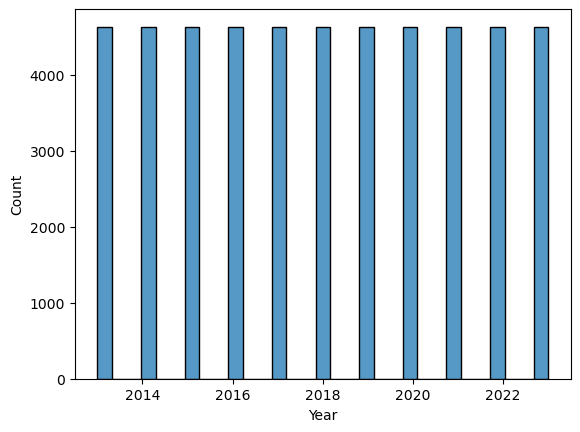

In [102]:
import seaborn as sns
sns.histplot(data['Year'])

**Categorical Variables:**

**Frequency Count: Check the frequency distribution of categorical variables (e.g., how many values of each category exist).**

In [104]:
data['Industry_code_NZSIOC'].value_counts()

Industry_code_NZSIOC
GH12     396
CC82     396
FF       396
CC912    396
CC911    396
        ... 
KK12     275
KK121    275
KK122    275
KK13     275
KK131    275
Name: count, Length: 139, dtype: int64

<Axes: xlabel='Units', ylabel='count'>

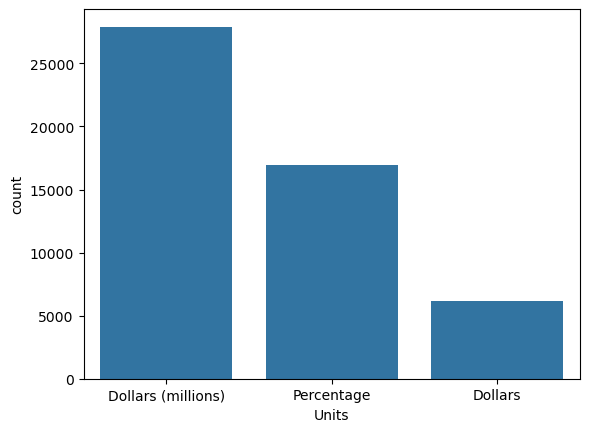

In [106]:
sns.barplot(x=data['Units'].value_counts().index, y=data['Industry_aggregation_NZSIOC'].value_counts())


## 4. Bivariate Analysis (Two Variable Analysis)

*Bivariate analysis explores the relationship between two variables, either numerical, categorical, or a combination of both.*

**Numerical vs. Numerical:**

**Correlation: Examine the relationship between two numerical variables using scatter plots and correlation coefficients.**

In [ ]:
sns.scatterplot(x=data['Year'], y=data['Value'])
data[['Sr_no', 'Year']].corr()  # Pearson correlation coefficient

**Categorical vs. Numerical:**

**Box Plot: Compare the distribution of a numerical variable across different categories.**

<Axes: xlabel='Industry_aggregation_NZSIOC', ylabel='Sr_no.'>

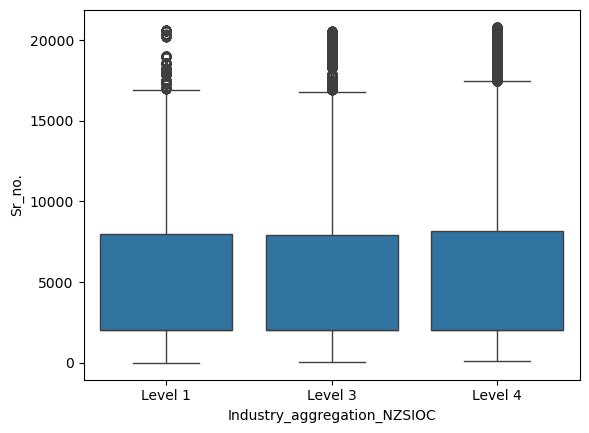

In [121]:
sns.boxplot(x=data['Industry_aggregation_NZSIOC'], y=data['Sr_no.'])

**Categorical vs. Categorical:**

**Contingency Table: Analyze the frequency of combinations of two categorical variables.**

In [123]:
pd.crosstab(data['Industry_code_NZSIOC'], data['Industry_name_NZSIOC'])

Industry_name_NZSIOC,Accommodation,Accommodation and Food Services,Administrative and Support Services,"Adult, Community and Other Education","Advertising, Market Research and Management Services","Agriculture, Forestry and Fishing","Agriculture, Forestry and Fishing Support Services and Hunting",All industries,Arts and Recreation Services,"Arts, Recreation and Other Services",...,"Textile, Leather, Clothing and Footwear Manufacturing",Transport Equipment Manufacturing,Transport Support Services,"Transport, Postal and Warehousing",Travel Agency and Tour Arrangement Services,Veterinary and Other Professional Services,Warehousing and Storage Services,"Water, Sewerage, Drainage and Waste Services",Wholesale Trade,Wood Product Manufacturing
Industry_code_NZSIOC,,,,,,,,,,,,,,,,,,,,,
99999,0,0,0,0,0,0,0,341,0,0,...,0,0,0,0,0,0,0,0,0,0
AA,0,0,0,0,0,341,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AA11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AA111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AA12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RS21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RS211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RS212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Stacked Bar Plot: Visualize the relationship between two categorical variables.**

<Axes: xlabel='Variable_code', ylabel='count'>

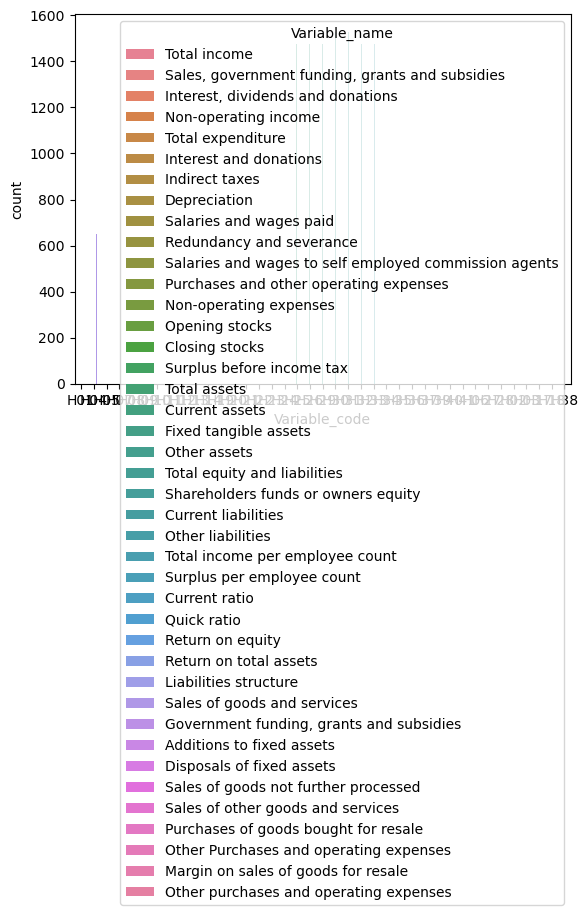

In [128]:
sns.countplot(x='Variable_code', hue='Variable_name', data=data)

## 5. Multivariate Analysis (Multiple Variable Analysis)

*Multivariate analysis looks at the interactions between three or more variables to understand how they collectively affect outcomes.*

**Pair Plot: Visualize the relationships between multiple numerical variables.**

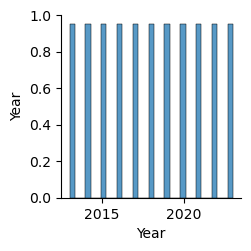

In [133]:
sns.pairplot(data[['Year', 'Industry_aggregation_NZSIOC', 'Industry_code_NZSIOC']])

**Dimensionality Reduction: Use techniques like PCA (Principal Component Analysis) or t-SNE to reduce the dimensionality of the data and visualize relationships in 2D or 3D.**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data[['Year', 'Industry_aggregation_NZSIOC', 'Industry_code_NZSIOC']])

## 6. Outlier Detection

*Outliers are data points that deviate significantly from the rest of the data. Identifying them is crucial, as they can distort analyses and models.*

**Visual Detection: Use box plots, histograms, or scatter plots to spot outliers.**

<Axes: xlabel='Variable_category'>

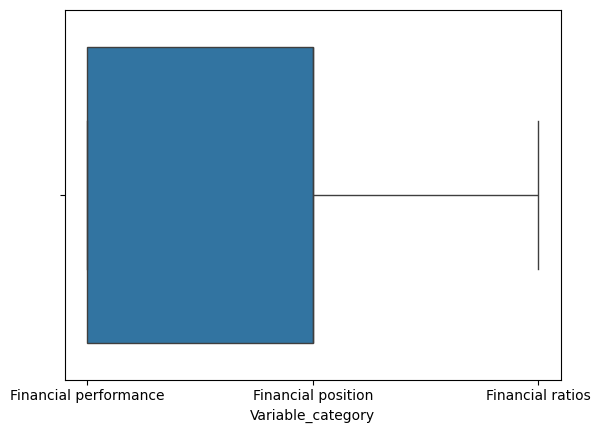

In [144]:
sns.boxplot(x=data['Variable_category'])


**Statistical Methods: Use the Z-score**

## Z-Score

In [150]:
from scipy.stats import zscore
z_scores = zscore(data['Year'])
outliers = data[abs(z_scores) > 3]

## IQR (Interquartile Range):

In [ ]:
Q1 = data['column_name'].quantile(0.25)
Q3 = data['column_name'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['column_name'] < lower_bound) | (data['column_name'] > upper_bound)]


## 7. Feature Engineering

*Feature engineering involves creating new features that can improve the performance of machine learning models or make the data more interpretable.*

**Transformation: Create new features by transforming existing ones (e.g., log transformation for skewed data).**

In [161]:
import numpy as np

In [ ]:
data['Industry_name_NZSIOC'] = np.log(data['Variable_category'])

## 8. Hypothesis Testing

*At this stage, you can perform statistical tests to validate assumptions or hypotheses you have about the data.*

**T-test: Compare means between two groups.**

In [172]:
from scipy.stats import ttest_ind
group1 = data[data['Industry_name_NZSIOC'] == 'A']['Industry_code_NZSIOC']
group2 = data[data['Variable_category'] == 'B']['Variable_name']
ttest_ind(group1, group2)

TtestResult(statistic=nan, pvalue=nan, df=nan)

**Chi-Square Test: For categorical data, check if two variables are independent.**

In [178]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['Variable_code'], data['Variable_name'])
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=1930843.2702609892, pvalue=0.0, dof=1520, expected_freq=array([[39.58576052, 45.85350593, 44.20409924, ..., 45.85350593,
        45.85350593, 41.89492988],
       [14.80906149, 17.15382956, 16.53678533, ..., 17.15382956,
        17.15382956, 15.67292341],
       [14.80906149, 17.15382956, 16.53678533, ..., 17.15382956,
        17.15382956, 15.67292341],
       ...,
       [39.58576052, 45.85350593, 44.20409924, ..., 45.85350593,
        45.85350593, 41.89492988],
       [39.58576052, 45.85350593, 44.20409924, ..., 45.85350593,
        45.85350593, 41.89492988],
       [39.58576052, 45.85350593, 44.20409924, ..., 45.85350593,
        45.85350593, 41.89492988]]))

## 9. Data Visualization

*Throughout the EDA process, visualization helps to understand patterns, distributions, and relationships. Visualizations can be created using libraries like Matplotlib, Seaborn, or Plotly in Python.*

### Common plots:
Histograms for distribution.
Scatter plots for relationships between two variables.
Heatmaps for correlations.
Box plots for detecting outliers and distribution.
Pair plots for exploring relationships between multiple variables.

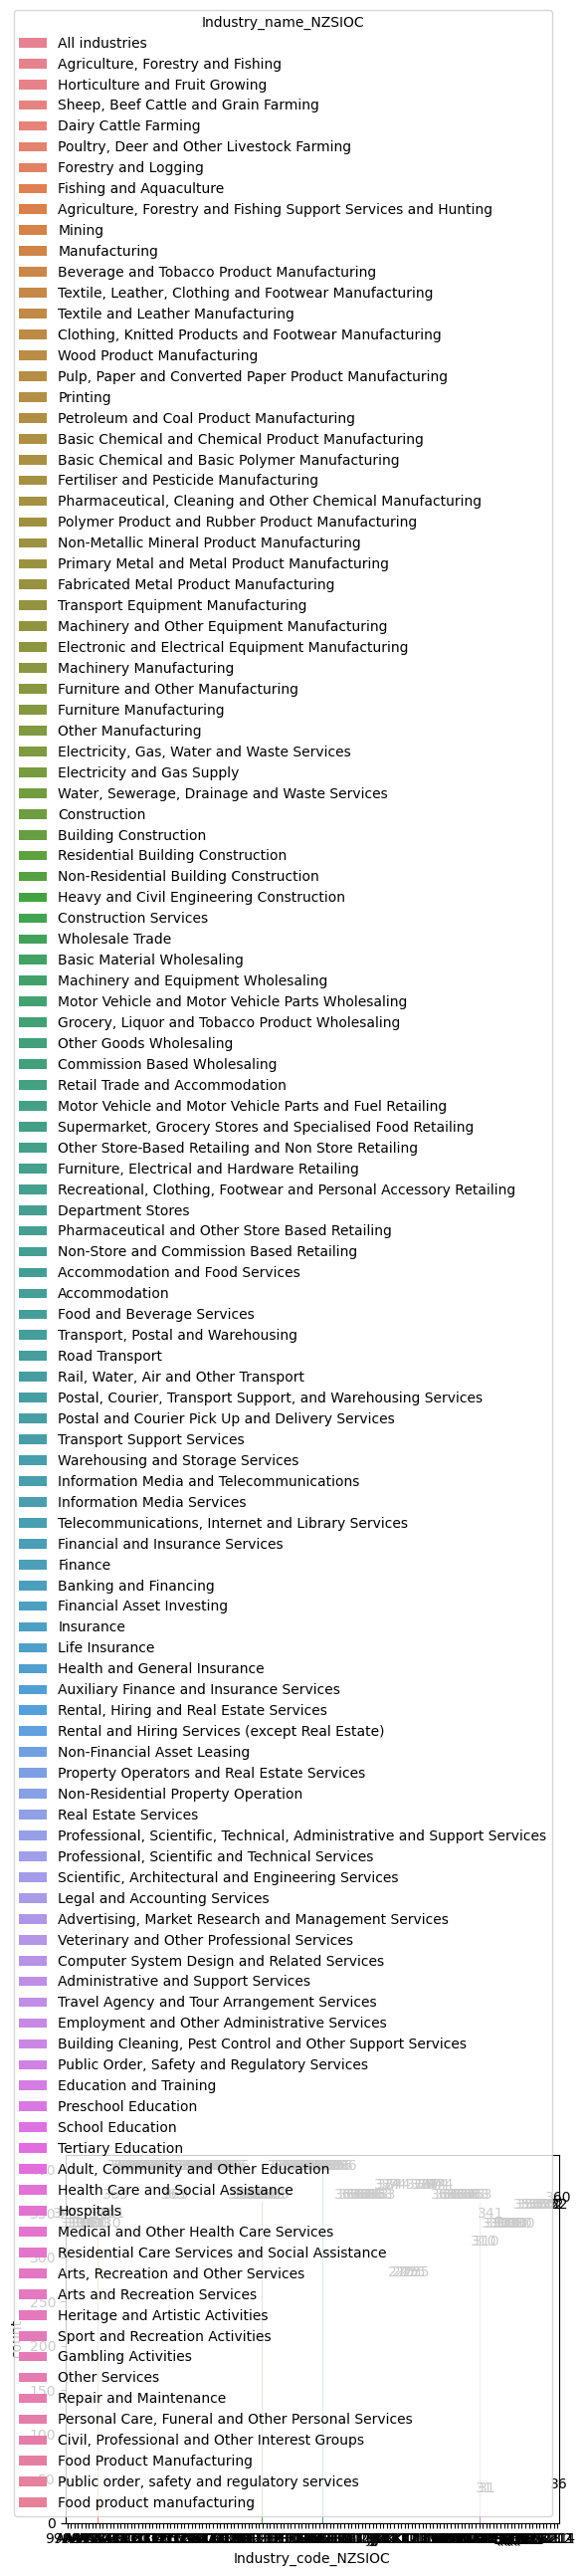

In [188]:
ax = sns.countplot(data, x = 'Industry_code_NZSIOC', hue = 'Industry_name_NZSIOC')

for bars in ax.containers:
    ax.bar_label(bars)